In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from data_gmm import *
from plots import *
import math
from torch.distributions.uniform import Uniform

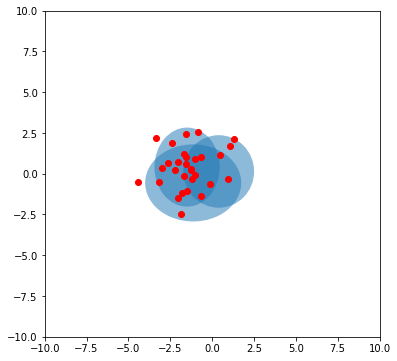

0


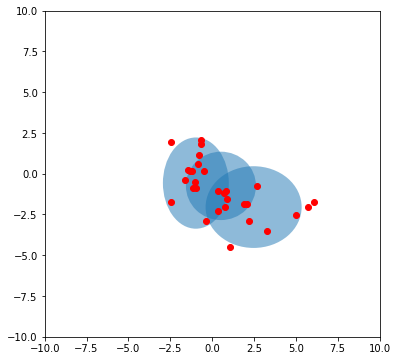

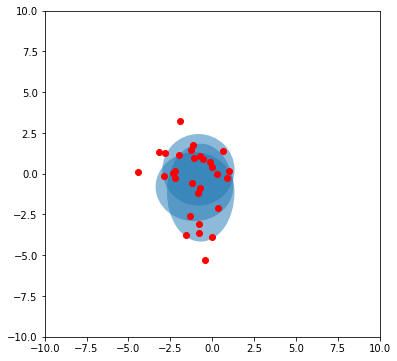

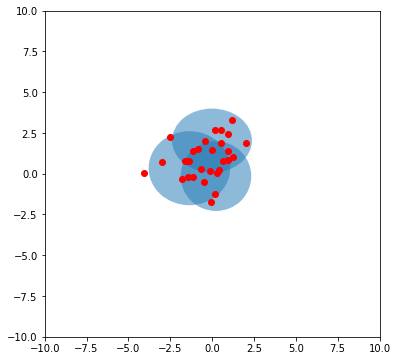

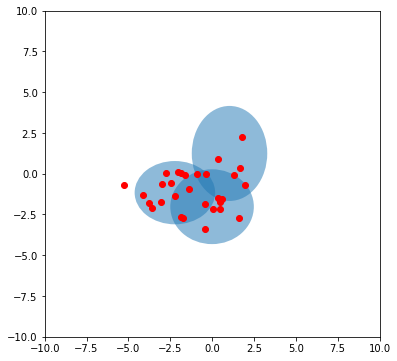

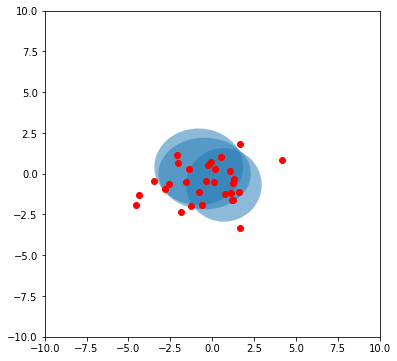

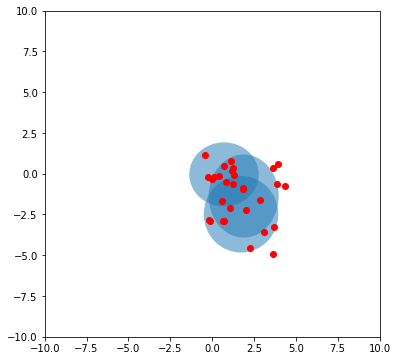

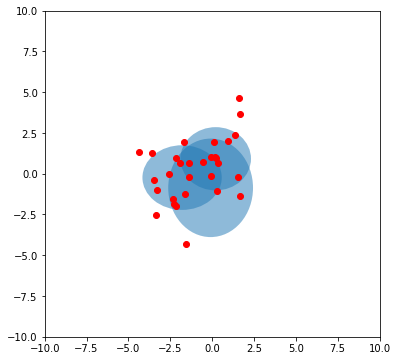

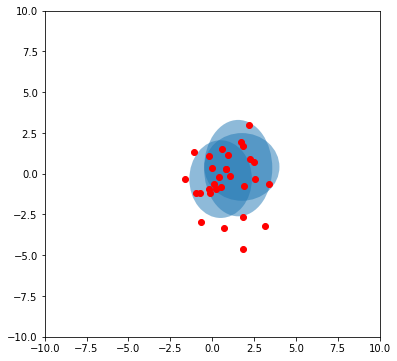

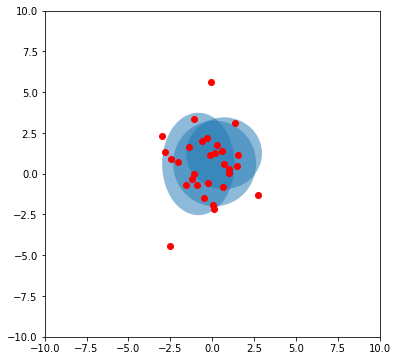

In [2]:
T = 30
K = 3
D = 2
num_seqs = 10
radius =  5.0
Ys = np.zeros((num_seqs, T, D))
Zs_true = np.zeros((num_seqs, T, K))
Mus = np.zeros((num_seqs, K, D))
Covs = np.zeros((num_seqs, K, D)) ## diagonal covarince
boundary = 7.0
for n in range(num_seqs):
    ind = Uniform(0, 2*math.pi).sample().item()
    Y, mus_true, covs_true, Z, Pi = sampling_gmm_conjugate(T, K, D)
    covs_full = torch.zeros((K, D, D))
    for k in range(K):
        covs_full[k] = torch.diag(covs_true[k])
    plot_clusters(Y, mus_true, covs_full)
    Ys[n] = Y.data.numpy()
    Zs_true[n] = Z.data.numpy()
    Mus[n] = mus_true.data.numpy()
    Covs[n] = covs_true.data.numpy()
    if n % 100 == 0:
        print(n)

In [ ]:
np.save('gmm_dataset2/sequences', Ys)
np.save('gmm_dataset2/states', Zs_true)
np.save('gmm_dataset2/means', Mus)
np.save('gmm_dataset2/covariances', Covs)
np.save('gmm_dataset2/init', Pi.data.numpy())

In [ ]:
plot_clusters(Y, mus_true, covs_true)

In [ ]:
samples = Gamma(torch.ones(D)*5, torch.ones(D)*8).sample((1000,))

In [ ]:
plt.scatter(1./ torch.sqrt(samples).data.numpy()[:, 0], 1. / torch.sqrt(samples).data.numpy()[:, 1])
plt.xlim([0, 10])
plt.ylim([0, 10])

In [ ]:
mus_true = torch.zeros((K, D)).float()
for k in range(K):
    if k == 0 :
    mus_true[k] = Uniform(0, boundary).sample((2,)) * torch.from_numpy(np.random.choice([-1, 1], 2)).float()


In [ ]:
torch.norm(mus_true - next_mus, dim=-1)

In [ ]:
torch.norm(next_mus)